In [67]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df=yf.download('^GDAXI',start='2019-01-01')

[*********************100%%**********************]  1 of 1 completed


In [69]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200
...,...,...,...,...,...,...
2024-03-26,18262.109375,18411.980469,18256.810547,18384.349609,18384.349609,58786600
2024-03-27,18385.169922,18511.169922,18385.169922,18477.089844,18477.089844,66344700
2024-03-28,18477.400391,18513.830078,18468.869141,18492.490234,18492.490234,75716300


In [70]:
df['MA20']=df['Adj Close'].rolling(20).mean()
df['MA50']=df['Adj Close'].rolling(50).mean()

In [71]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700,NaN,NaN
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800,NaN,NaN
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500,NaN,NaN
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400,NaN,NaN
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-03-26,18262.109375,18411.980469,18256.810547,18384.349609,18384.349609,58786600,17916.036035,17347.286406
2024-03-27,18385.169922,18511.169922,18385.169922,18477.089844,18477.089844,66344700,17959.829492,17388.194414
2024-03-28,18477.400391,18513.830078,18468.869141,18492.490234,18492.490234,75716300,18000.544531,17426.697227


In [72]:
df=df.dropna()

In [73]:
df=df[['Adj Close','MA20','MA50']]
df

,Adj Close,MA20,MA50
Date,,,
2019-03-12,11524.169922,11447.165967,11187.565020
2019-03-13,11572.410156,11467.425488,11207.409414
2019-03-14,11587.469727,11492.309473,11230.825605
2019-03-15,11685.690430,11511.604004,11249.185605
2019-03-18,11657.059570,11529.496973,11267.370605
...,...,...,...
2024-03-26,18384.349609,17916.036035,17347.286406
2024-03-27,18477.089844,17959.829492,17388.194414
2024-03-28,18492.490234,18000.544531,17426.697227


In [74]:
Buy=[]
Sell=[]

for i in range(len(df)):
    if df.MA20.iloc[i]>df.MA50.iloc[i] \
    and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i]<df.MA50.iloc[i] \
    and df.MA20.iloc[i-1]>df.MA50.iloc[i-1]:
        Sell.append(i)

In [75]:
Buy

[75, 132, 288, 432, 613, 671, 719, 789, 820, 867, 926, 1041, 1113, 1197]

In [76]:
Sell

[59, 102, 243, 398, 601, 640, 699, 735, 796, 830, 888, 1026, 1102, 1129]

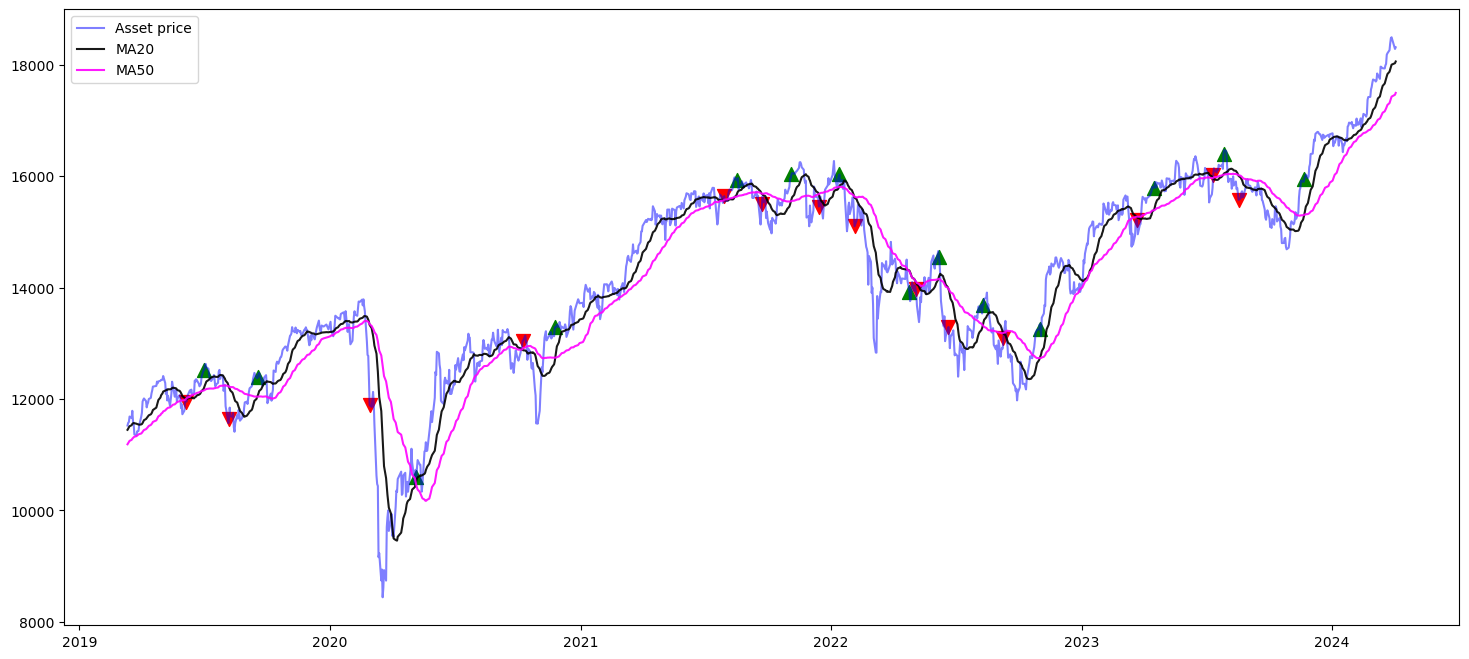

In [77]:
plt.figure(figsize=(18,8))

plt.plot(df['Adj Close'],label='Asset price',c='blue',alpha=0.5)
plt.plot(df['MA20'],label='MA20',c='k',alpha=0.9)

plt.plot(df['MA50'],label='MA50',c='magenta',alpha=0.9)
plt.scatter(df.iloc[Buy].index,df.iloc[Buy]['Adj Close'],marker= '^',color='g',s=100)
plt.scatter(df.iloc[Sell].index,df.iloc[Sell]['Adj Close'],marker= 'v',color='r',s=100)
plt.legend()
plt.show()